In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Firts model with ResNet50, size of images must be 224x224

img_height, img_width = 224, 224
batch_size = 32 

# Set the images directorys

train_dir = '../data/train'
valid_dir = '../data/valid'
test_dir = '../data/test'

# Images Preprocessing

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 452 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


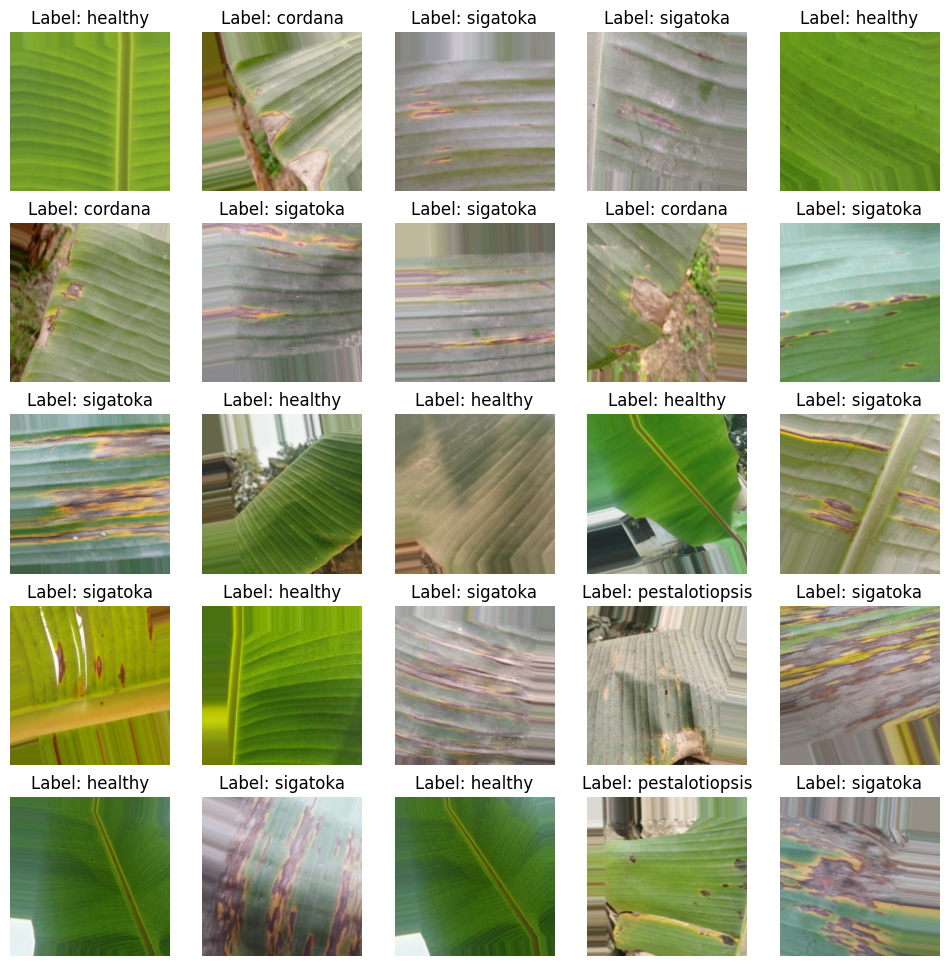

In [6]:
# Get a dictionary of classes (name -> index)
class_labels = train_generator.class_indices

# Reset the dictionary to get the index of the class
class_labels = {v: k for k, v in class_labels.items()}

# Get a batch of images and labels
images, labels = next(train_generator)

# Show the images and labels
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    label_index = labels[i].argmax()  
    plt.title(f'Label: {class_labels[label_index]}')
plt.show()

In [ ]:
# Load ResNet50 model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model

base_model.trainable = False